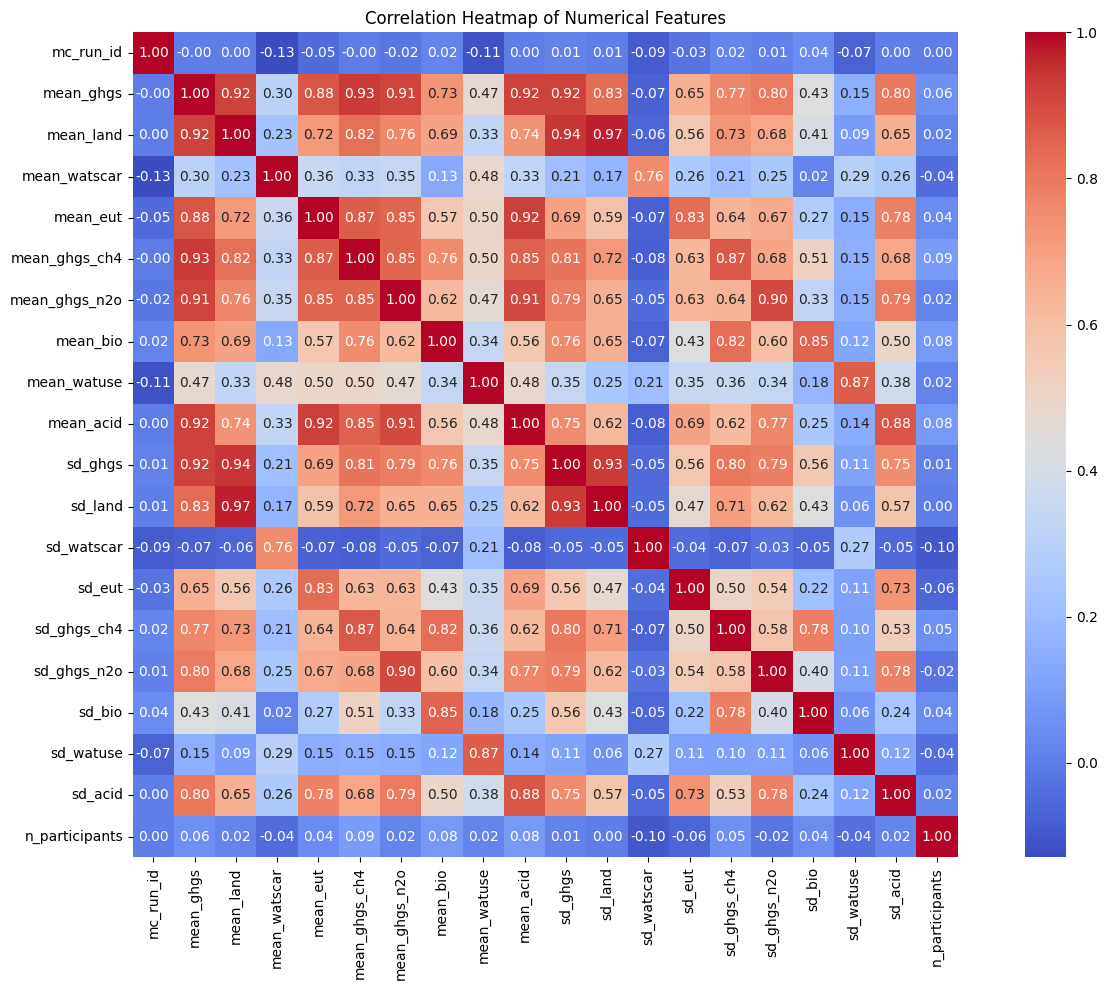

Highly Correlated Feature Pairs (r > 0.85):
        Feature 1      Feature 2  Correlation
29        sd_land      mean_land     0.971606
8       mean_land        sd_land     0.971606
7       mean_land        sd_ghgs     0.940013
27        sd_ghgs      mean_land     0.940013
30        sd_land        sd_ghgs     0.933372
28        sd_ghgs        sd_land     0.933372
12  mean_ghgs_ch4      mean_ghgs     0.929519
2       mean_ghgs  mean_ghgs_ch4     0.929519
22      mean_acid       mean_eut     0.921103
11       mean_eut      mean_acid     0.921103
21      mean_acid      mean_ghgs     0.920163
4       mean_ghgs      mean_acid     0.920163
5       mean_ghgs        sd_ghgs     0.918714
26        sd_ghgs      mean_ghgs     0.918714
0       mean_ghgs      mean_land     0.916768
6       mean_land      mean_ghgs     0.916768
16  mean_ghgs_n2o      mean_ghgs     0.912880
3       mean_ghgs  mean_ghgs_n2o     0.912880
24      mean_acid  mean_ghgs_n2o     0.905625
17  mean_ghgs_n2o      mean_acid    

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Load the dataset
df = pd.read_csv("Results_21Mar2022.csv")

#Calculate the correlation matrix 
correlation_matrix = df.select_dtypes(include='number').corr()

#Plot the heatmap 
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()

#Find highly correlated pairs 
high_corr = correlation_matrix[(correlation_matrix > 0.85) & (correlation_matrix < 1.0)]


high_corr_pairs = high_corr.stack().reset_index()
high_corr_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']
high_corr_pairs = high_corr_pairs.sort_values(by='Correlation', ascending=False)

print("Highly Correlated Feature Pairs (r > 0.85):")
print(high_corr_pairs)


In [3]:
# Merge meat-related groups 
meat_groups = ['meat', 'meat50', 'meat100']
df['diet_group'] = df['diet_group'].apply(lambda x: 'meat_eater' if x in meat_groups else x)

# Group and average mean_ghgs
treemap_df = df.groupby(['diet_group', 'sex', 'age_group'])[['mean_ghgs']].mean().reset_index()

# Create the treemap 
fig = px.treemap(
    treemap_df,
    path=['diet_group', 'sex', 'age_group'],
    values='mean_ghgs',
    color='mean_ghgs',
    color_continuous_scale='IceFire',  # More distinguishable colors
    title='Treemap of Mean GHG Emissions by Diet Group, Sex, and Age Group',
    width=1500,
    height=1500
)

fig.show()


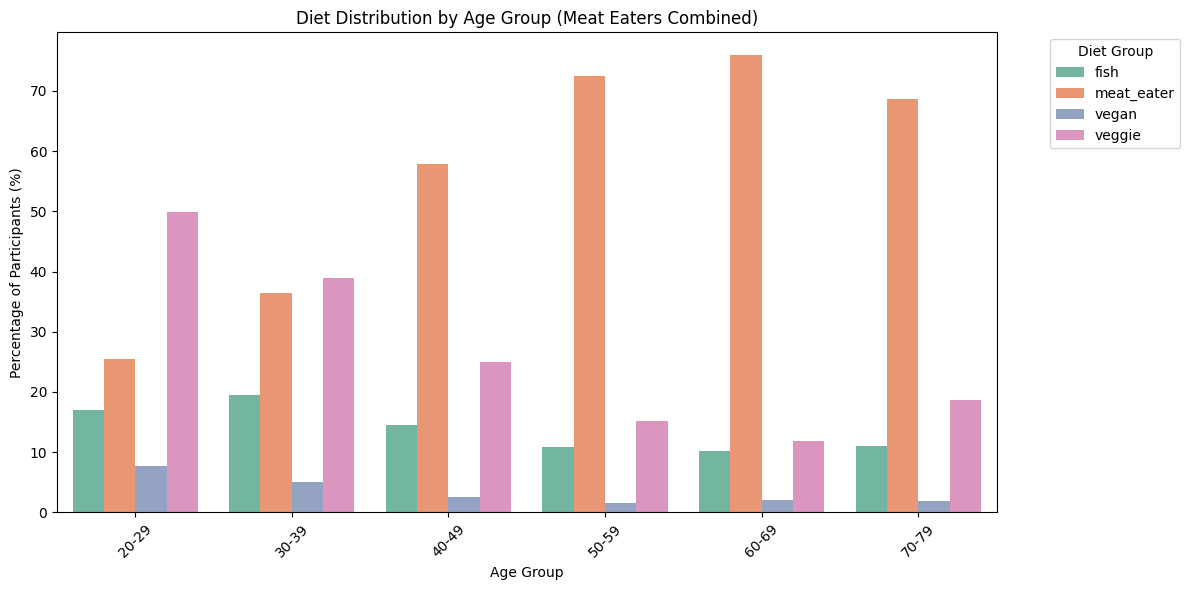

In [4]:
df['diet_group'] = df['diet_group'].replace({
    'meat': 'meat eaters',
    'meat50': 'meat eaters',
    'meat100': 'meat eaters'
})

# Group by age group
grouped = df.groupby(['age_group', 'diet_group'])['n_participants'].sum().reset_index()

# Calculate percentage 
grouped['percentage'] = grouped.groupby('age_group')['n_participants'].transform(lambda x: 100 * x / x.sum())

# Plot creating
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped, x='age_group', y='percentage', hue='diet_group', palette='Set2')
plt.title('Diet Distribution by Age Group (Meat Eaters Combined)')
plt.xlabel('Age Group')
plt.ylabel('Percentage of Participants (%)')
plt.xticks(rotation=45)
plt.legend(title='Diet Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
